# potentially useful code snippets for potential later use

In [2]:
# we put the incoming data in here:
np_eo = dynarray.DynamicArray((None, len(channel_names)))

# init/open the window in which we visualize data
w=guis.AcquireData(sampling_freq, channel_names)

# before we start, pull everything from the buffer (empty it)
data_inlet.pull_chunk()
while data_inlet.samples_available(): data_inlet.pull_chunk() 
    
# then start acquiring data as long as button 'stop' not pressed:
w.RUNLOOP=True
while w.RUNLOOP:


    if not data_inlet.samples_available():
        w.update(None)
    else:
        
        chunk_data, chunk_times = data_inlet.pull_chunk(timeout=0.0) # grab from LSL

        np_eo.extend(chunk_data) # add to our list
        w.update(chunk_data) # update the GUI window        

NameError: name 'dynarray' is not defined

In [ ]:
# visualize delay between a reported 'hit' (stimulus computer) and a signalled 'hit' (analysis computer)
new_evs, event_id = mne.events_from_annotations(rtanalyzed_nftraining_eeg, event_id={'hit':2})
epoched=mne.Epochs(rtanalyzed_nftraining_eeg, new_evs, 2, tmin=-0.8, tmax=0.1);
epoched.drop(np.squeeze(np.sum(epoched.get_data(picks='vmarker'),axis=2)!=1))
conv_func = scipy.signal.gaussian(epoched.info['sfreq']/10, std=epoched.info['sfreq']/20)
m = np.squeeze(epoched.get_data(picks='vmarker'))
new_m = np.apply_along_axis(lambda m: np.convolve(m, conv_func, mode='same'), axis=1, arr=m)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(epoched.times, np.mean(new_m, axis=0))
# plt.plot(epoched.times, new_m.T)
plt.xlabel('time (s)')
plt.title('delay between stimulus & analysis computers for NF \'hits\'');


# Kalman Filter Tryouts

In [3]:
x0 = 0
v0 = 0

In [5]:
def predict(xp, vp):
    xn_prior = xp + vp
    vn_prior = vp
    return (xn_prior, vn_prior)

In [7]:
def update(xn_prior, vn_prior, x_measured):
    alpha = 0.2
    beta = 0.1
    xn_posterior = xn_prior + alpha * (x_measured - xn_prior)
    vn_posterior = vn_prior + beta * (x_measured - xn_prior)

    return (xn_posterior, vn_posterior)
    

In [11]:
predicted_x = []
updated_x = []
predicted_v = []
updated_v = []

x=0
v=0

for data in range(1000):
    new_x_prior, new_v_prior = predict(x, v)
    new_x_posterior, new_y_posterior = update(new_x_prior, new_v_prior, data)
    x, v = (new_x_posterior, new_y_posterior)
    
    predicted_x.append(new_x_prior)
    predicted_v.append(new_v_prior)
    updated_x.append(new_x_posterior)
    updated_v.append(new_y_posterior)
    
    
    

In [12]:
import matplotlib.pyplot as plt

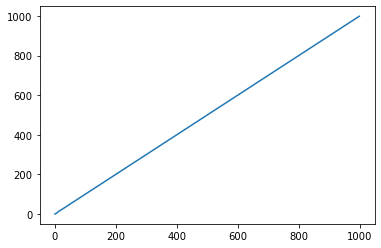

In [16]:
plt.plot(updated_x)